In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df=pd.read_csv("/content/diabetes.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [22]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

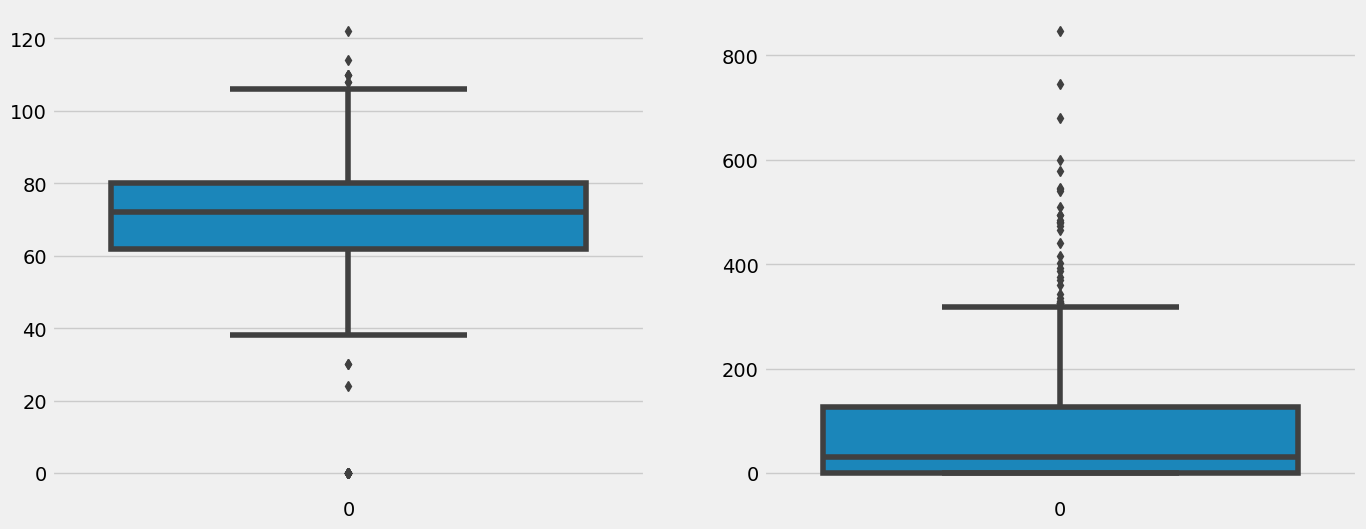

In [9]:
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"]=(15,6)

plt.subplot(1,2,1)
sns.boxplot(df["BloodPressure"])

plt.subplot(1,2,2)
sns.boxplot(df["Insulin"])



In [31]:
df=df[df["BloodPressure"]>40]
df=df[df["BloodPressure"]<100]

In [32]:
df=df[df["Insulin"]<250]

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<ipython-input-33-fe5ec23cb236>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Pregnancies"])
<ipython-input-33-fe5ec23cb236>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Glucose"])
<ipython-input-33-fe5ec23cb236>:10: UserWarning: 

`distplot` is a deprecated function and will be r

<Axes: xlabel='Outcome', ylabel='Density'>

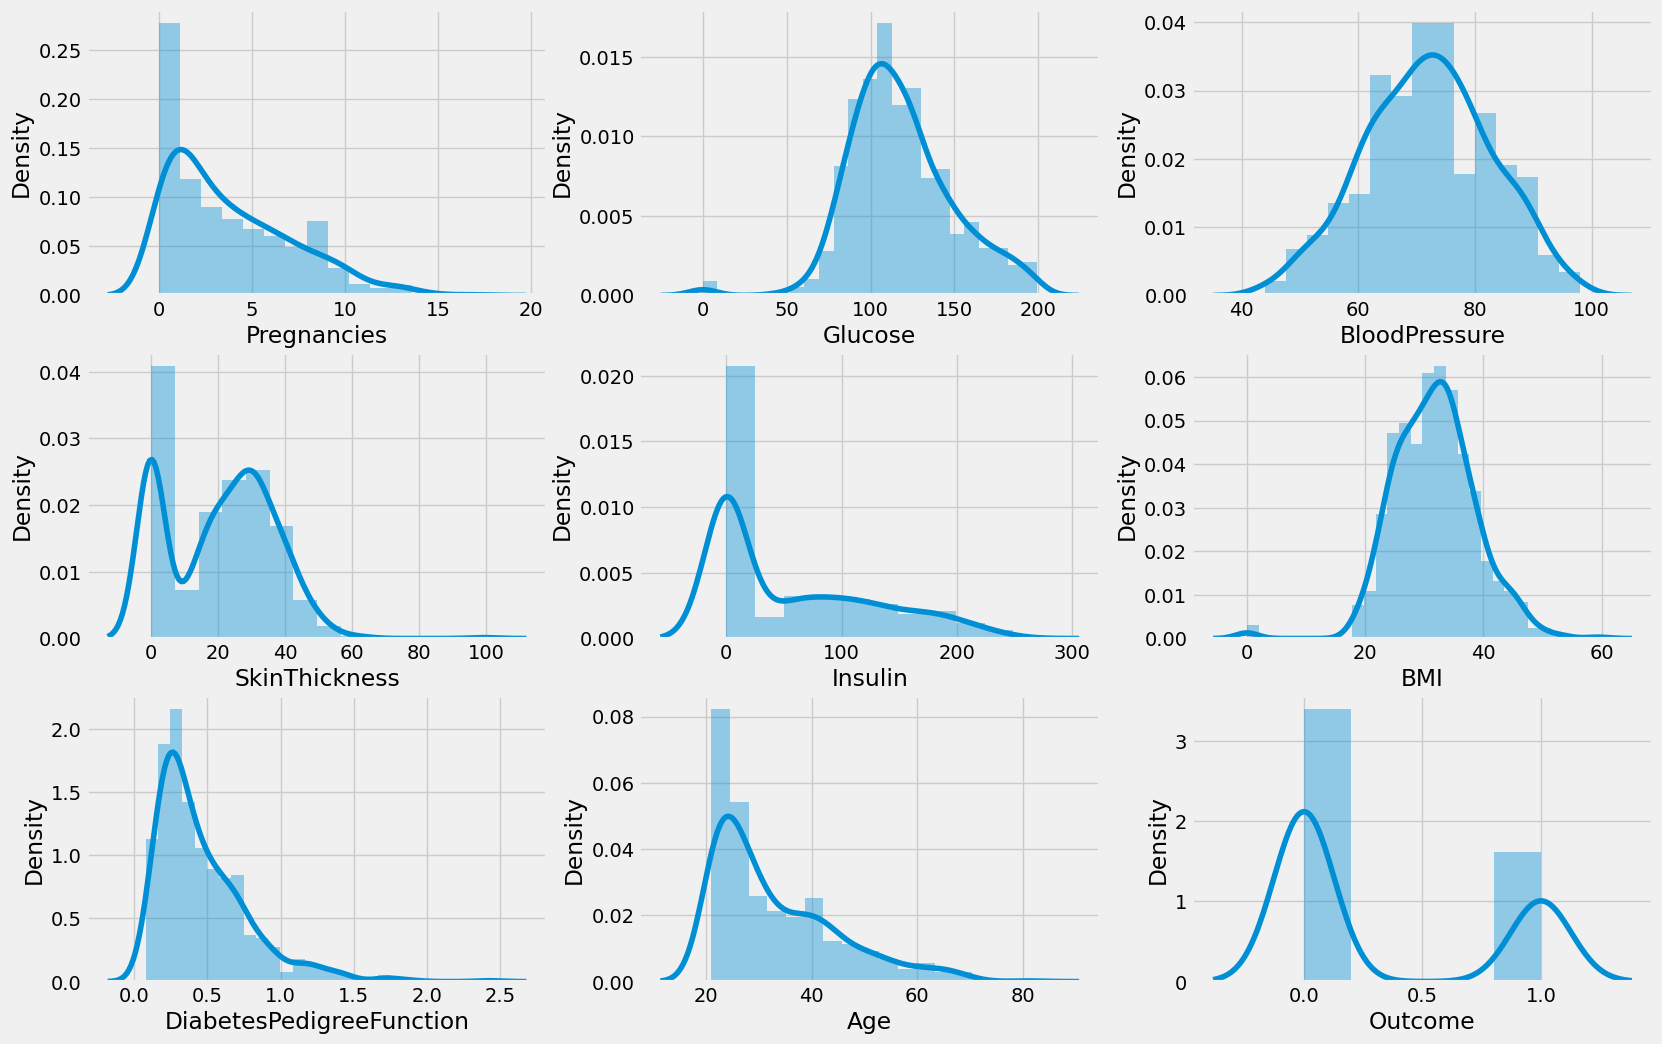

In [33]:
plt.rcParams["figure.figsize"]=(18,12)

plt.subplot(3,3,1)
sns.distplot(df["Pregnancies"])

plt.subplot(3,3,2)
sns.distplot(df["Glucose"])

plt.subplot(3,3,3)
sns.distplot(df["BloodPressure"])

plt.subplot(3,3,4)
sns.distplot(df["SkinThickness"])

plt.subplot(3,3,5)
sns.distplot(df["Insulin"])

plt.subplot(3,3,6)
sns.distplot(df["BMI"])

plt.subplot(3,3,7)
sns.distplot(df["DiabetesPedigreeFunction"])

plt.subplot(3,3,8)
sns.distplot(df["Age"])

plt.subplot(3,3,9)
sns.distplot(df["Outcome"])

In [35]:
from scipy import stats
df["Pregnancies"]=np.sqrt(df["Pregnancies"])

In [36]:

df["SkinThickness"]=np.sqrt(df["SkinThickness"])
df["Insulin"]=np.sqrt(df["Insulin"])
df["DiabetesPedigreeFunction"]=np.sqrt(df["DiabetesPedigreeFunction"])
df["Age"]=np.sqrt(df["Age"])


<ipython-input-37-fe5ec23cb236>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Pregnancies"])
<ipython-input-37-fe5ec23cb236>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Glucose"])
<ipython-input-37-fe5ec23cb236>:10: UserWarning: 

`distplot` is a deprecated function and will be r

<Axes: xlabel='Outcome', ylabel='Density'>

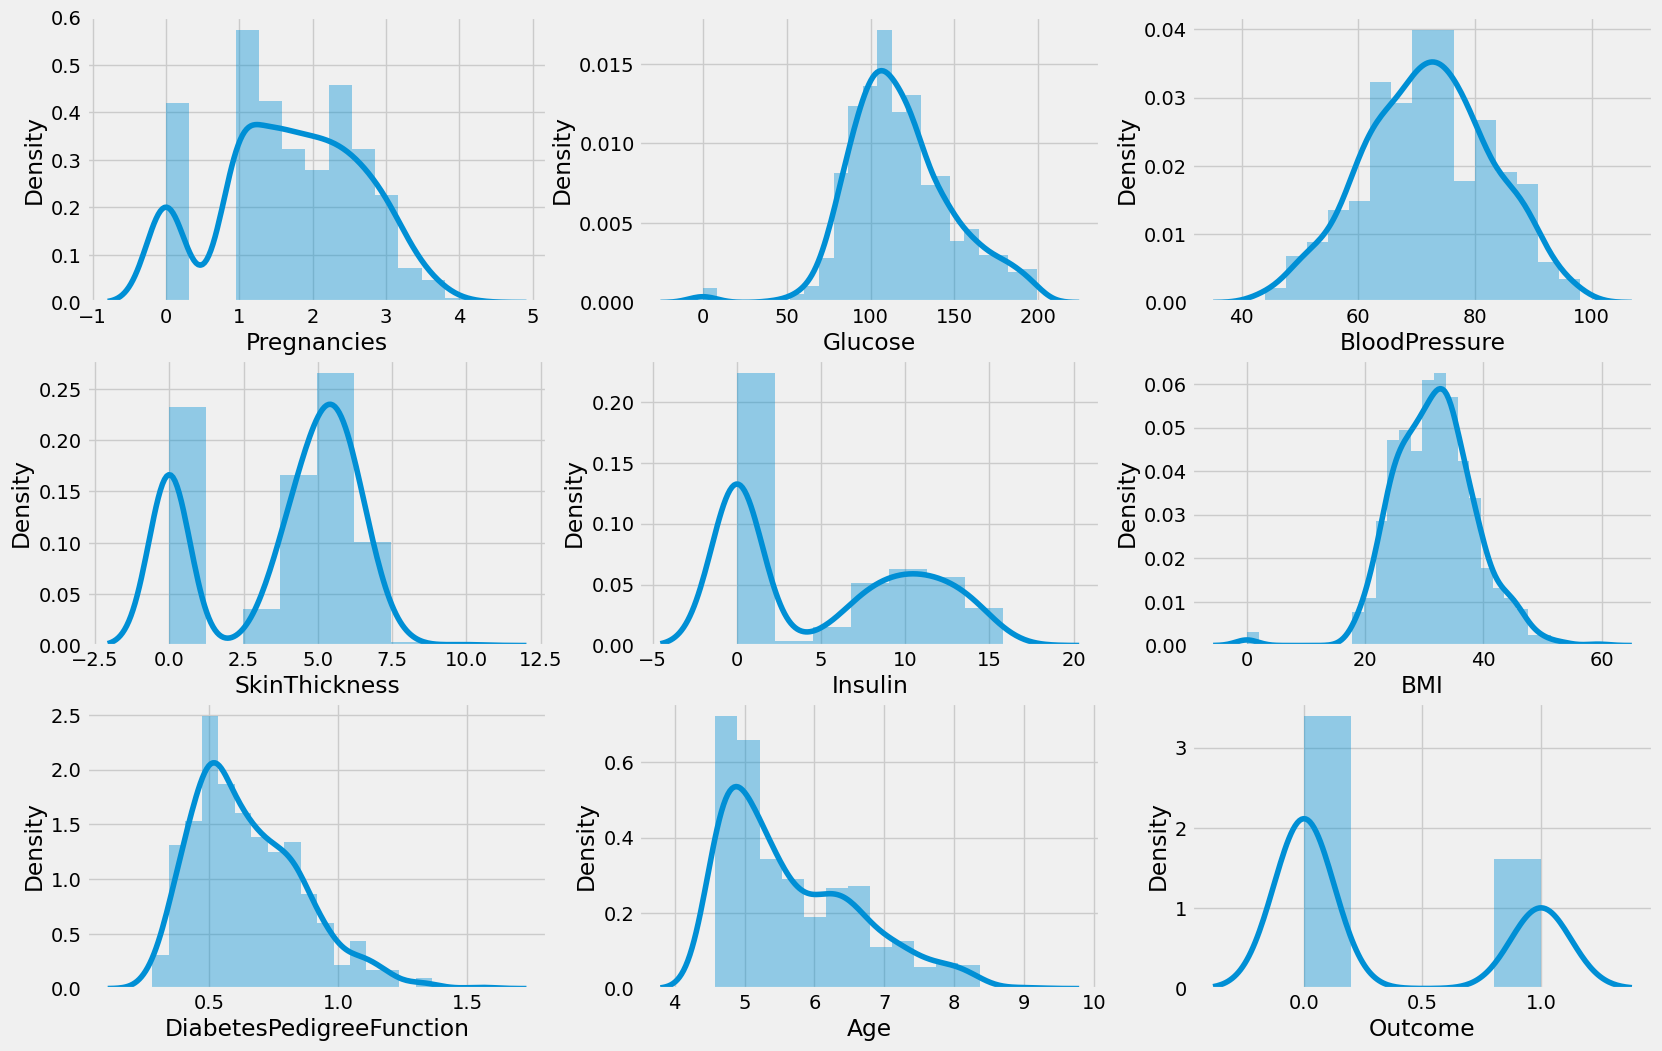

In [37]:
plt.rcParams["figure.figsize"]=(18,12)

plt.subplot(3,3,1)
sns.distplot(df["Pregnancies"])

plt.subplot(3,3,2)
sns.distplot(df["Glucose"])

plt.subplot(3,3,3)
sns.distplot(df["BloodPressure"])

plt.subplot(3,3,4)
sns.distplot(df["SkinThickness"])

plt.subplot(3,3,5)
sns.distplot(df["Insulin"])

plt.subplot(3,3,6)
sns.distplot(df["BMI"])

plt.subplot(3,3,7)
sns.distplot(df["DiabetesPedigreeFunction"])

plt.subplot(3,3,8)
sns.distplot(df["Age"])

plt.subplot(3,3,9)
sns.distplot(df["Outcome"])

In [38]:
df["Outcome"].value_counts()

0    444
1    211
Name: Outcome, dtype: int64

In [39]:
X = df.drop("Outcome" , axis = 1)

y = df[["Outcome"]]

In [40]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,train_size=0.7 , random_state = 42)

In [41]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

In [42]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42 , max_depth= 5 , n_estimators=100 , oob_score = True)
classifier_rf.fit(X_train , y_train)

<ipython-input-42-9fcd8d99e7a9>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier_rf.fit(X_train , y_train)


RandomForestClassifier(max_depth=5, oob_score=True, random_state=42)

In [60]:
print("Testing Accuracy : " , classifier_rf.score(X_test , y_test))

Testing Accuracy :  0.7563451776649747


In [61]:
from sklearn.metrics import confusion_matrix 
predictions=classifier_rf.predict(X_test)
matrix = confusion_matrix(y_test , predictions)
matrix

array([[120,   9],
       [ 39,  29]])

In [62]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

#Accuracy and Classification report
print(accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions))

0.7563451776649747
              precision    recall  f1-score   support

           0       0.75      0.93      0.83       129
           1       0.76      0.43      0.55        68

    accuracy                           0.76       197
   macro avg       0.76      0.68      0.69       197
weighted avg       0.76      0.76      0.73       197



In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier().fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [65]:
# Confusion matrix için y_pred:
y_pred = knn_model.predict(X_train)

# AUC için y_prob:
y_prob = knn_model.predict_proba(X_train)[:, 1]

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       315
           1       0.77      0.61      0.68       143

    accuracy                           0.82       458
   macro avg       0.80      0.76      0.78       458
weighted avg       0.82      0.82      0.81       458

